2. Practice makes perfect—another great project to deepen your understanding
could be heart disease classification. The dataset can be downloaded directly
at https://www.kaggle.com/ronitf/heart-disease-uci, or from the original
page at https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

3. Don't forget to fine-tune the model you obtained from Exercise 2 using the
techniques you learned in this chapter. What is the best AUC it achieves?

GaussianNB → When you have continuous features.
CategoricalNB → When you have categorical data.
MultinomialNB → Applied to text data.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from pprint import pprint
from IPython.display import display

In [ ]:
کتابخانه های مورد نیاز در این قسمت اضافه شده است

In [2]:
df=pd.read_csv("heart/heart disease.csv", sep=",")
display(df.head(2))
print(df.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


(303, 14)


In [ ]:
دیتاست مربوطه را در قالب دیتافریم خوانده

In [3]:
print(df["target"].value_counts())
print()
print(df["target"].value_counts(normalize=True))

1    165
0    138
Name: target, dtype: int64

1    0.544554
0    0.455446
Name: target, dtype: float64


In [ ]:
برای ستون هدف
توزیع فراوانی را نمایش خواهیم داد

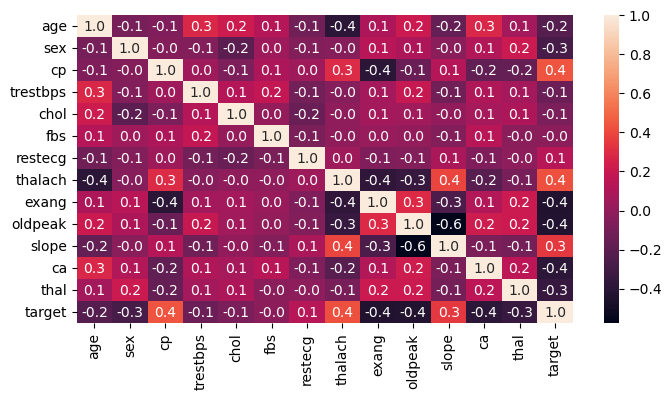

In [4]:
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt= ".1f", ax=ax)
plt.show()

In [ ]:
برای تجسم بهتر فیلدها از 
corr
برای بررسی میزان همبستگی فیلدها استفاده می کنیم

In [5]:
X=df.iloc[:, 0:13]
y=df.iloc[:,-1]

display(X.head(2))
display(y.head(2))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


0    1
1    1
Name: target, dtype: int64

In [ ]:
x,y
را جدا کرده

In [6]:
from sklearn.model_selection import train_test_split
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True) #, random_state=42

print(f"{X_train.shape,=}\t{X_test.shape,=}")
print(f"{y_train.shape,=}\t{y_test.shape,=}")

X_train.shape,=((242, 13),)	X_test.shape,=((61, 13),)
y_train.shape,=((242,),)	y_test.shape,=((61,),)


In [ ]:
به نسبت 80 به 20 داده ها را به منظور آموزش و آزمایش جدا می کنیم

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
با توجه به نرمال نبودن داده ها از 
StandardScaler
کتابخانه sklearn
استفاده می کنیم

In [8]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

In [ ]:
از مدل GaussianNB
به منظور ساخت طبقه بند استفاده خواهیم کرد

In [9]:
i=10
print(f"{y[i],=}")
print(f"{y_pred[i],=}")
print(f"{y_pred_prob[i],=}")

y[i],=(1,)
y_pred[i],=(0,)
y_pred_prob[i],=(array([0.99795012, 0.00204988]),)


In [ ]:
کلاس واقعی و پیش بینی شده و میزان احتمالات را برای داده با اندیس 10
نمایش داده شده است

In [10]:
from sklearn import metrics

print(f"Accuracy Score: {round(metrics.accuracy_score(y_test,y_pred),2)}")
print(f"F1 Score: {round(metrics.f1_score(y_test,y_pred),2)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test,y_pred),2)}")

Accuracy Score: 0.67
F1 Score: 0.68
ROC AUC Score: 0.67


In [ ]:
از metrics های 
مختلف برای بررسی میزان کارایی مدل استفاده خواهیم نمود

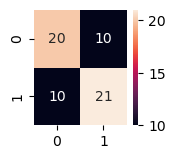

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(1.5, 1.5))
sns.heatmap(cm, annot=True, fmt='.0f', ax=ax)
plt.show()   # plt.savefig('ConfusionMatrix.png')

In [ ]:
ماتریس اغتشاش
را ترسیم کرده

### FineTune:

In [12]:
from sklearn.model_selection import StratifiedKFold
k=5
k_fold=StratifiedKFold(n_splits=k, shuffle=True) #, random_state=42
print(k_fold)

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


In [ ]:
از StratifiedKFold برای طبقه بندی داده ها
آموزشی و آزمایشی به 5 تکه استفاده خواهیم کرد

In [13]:
var_smoothing_option = [1e-100, 1e-10, 1e-5, 1e-9, 1, 1e1, 1e2, 1e5, 1e10, 1e100]
auc_record = {}

In [ ]:
برای تنظیم دقیق چندین مقدار برای پارامتر
var_smoothing_option
مشخص کرده ایم

In [14]:
X=X.to_numpy(); y=y.to_numpy()

for train_indices, test_indices in k_fold.split(X, y):
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = y[train_indices], y[test_indices]
    X_train = scaler.fit_transform(X_train);
    X_test = scaler.transform(X_test)
    for alpha in var_smoothing_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        clf = GaussianNB(var_smoothing=alpha)
        clf.fit(X_train, Y_train)
        prediction_prob = clf.predict_proba(X_test)
        pos_prob = prediction_prob[:, 1]
        auc = metrics.roc_auc_score(Y_test, pos_prob)
        auc_record[alpha] = round(auc, 3)
        
pprint(auc_record)

{1e-100: 0.865,
 1e-10: 0.865,
 1e-09: 0.865,
 1e-05: 0.865,
 1: 0.872,
 10.0: 0.865,
 100.0: 0.866,
 100000.0: 0.866,
 10000000000.0: 0.866,
 1e+100: 0.5}


In [ ]:
در نهایت بهترین مقدار را برای طبقه بند مشخص می کنیم که در اینجا
var_smoothing_option=1
1: 0.872,
می باشد